# 【实验】第4.2节实验3回归模型标准化

## 实验介绍

在本节实验中，我们将会介绍如何对房价数据集进行标准，并以线性回归模型为例来完成整个模型的训练和预测，并同时与sklearn中的实现进行对比。

### 知识点

- 特征标准化
- 线性回归实现
- 模型训练与对比

## 1.载入数据集及标准

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt


def standarlization(X):
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    return (X - mean) / std


def load_data(standarlized=True):
    data = fetch_california_housing()
    X = data.data
    y = data.target.reshape(-1, 1)
    if standarlized:
        X = standarlization(X)
    return X, y


## 2.定义预测函数和评价指标

In [2]:
def MSE(y, y_pre):
    return np.mean((y - y_pre) ** 2)


def prediction(X, W, bias):
    return np.matmul(X, W) + bias  # [m,n] @ [n,1] = [m,1]

## 3.定义目标函数和梯度下降

In [3]:
def cost_function(X, y, W, bias):
    m, n = X.shape
    y_hat = prediction(X, W, bias)
    return 0.5 * (1 / m) * np.sum((y - y_hat) ** 2)


def gradient_descent(X, y, W, bias, alpha):
    m, n = X.shape
    y_hat = prediction(X, W, bias)
    grad_w = -(1 / m) * np.matmul(X.T, (y - y_hat))  # [n,m] @ [m,1] = [n,1]
    grad_b = -(1 / m) * np.sum(y - y_hat)  # 求解梯度
    W = W - alpha * grad_w  # 梯度下降
    bias = bias - alpha * grad_b
    return W, bias

## 4.模型训练

In [4]:
def train(X, y, ite=200):
    m, n = X.shape  # 506,13
    W = np.random.randn(n, 1)
    b = 0.1
    alpha = 0.2
    costs = []
    for i in range(ite):
        J = cost_function(X, y, W, b)
        costs.append(J)
        W, b = gradient_descent(X, y, W, b, alpha)
    y_pre = prediction(X, W, b)
    print("MSE by implementation: ", MSE(y, y_pre))
    return costs


def train_by_sklearn(x, y):
    model = LinearRegression()
    model.fit(x, y)
    y_pre = model.predict(x)
    print("MSE by sklearn: ", MSE(y, y_pre))

## 5.运行

MSE by sklearn:  0.5243209861846072
MSE by implementation:  0.525159754386484


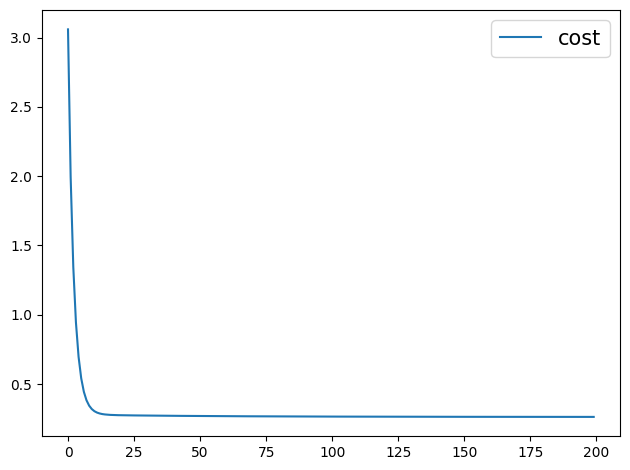

In [5]:
if __name__ == '__main__':
    x, y = load_data(standarlized=True)
    train_by_sklearn(x, y)
    costs = train(x, y)
    plt.plot(range(len(costs)), costs, label='cost')
    plt.legend(fontsize=15)
    plt.tight_layout()  # 调整子图间距
    plt.show()

## 实验总结

在本节实验中，我们介绍了如何对房价数据集进行标准，并以线性回归模型为例完成了整个模型的训练和预测，并同时与sklearn中的实现进行对比，两者在结果上并无显著差异，最后还对损失函数进行了可视化。